Lets see what we can do with a wordmap (plot, noise reduction and possibly partitioning into morphemes?)

In [7]:
import text_utilities as tu # importing data
import numpy as np # arrays
import scipy.stats as stats # arithmetics
import matplotlib.pyplot as pp # plotting
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# IMPORT DATA

wordset = tu.from_path('../data/experiment/verbs')

verb_dict = tu.count_syllables(wordset)
verb_dict.keys()
for i in range(1,9): # von mächtigster menge absteigend morpheme analysieren
    print(i, len(verb_dict[i]))

1 5010
2 27261
3 30123
4 14810
5 4455
6 1005
7 193
8 32


In [9]:
# CALCULATE RELATIVE FREQUENCY OF EACH LETTER AS FILTER FOR PLOTTING

allchars = ""
for sylnumber in verb_dict:
    for v in verb_dict[sylnumber]:
        allchars+=v


import collections as cl
n_maps = cl.Counter(list(allchars)).most_common()
char_array = np.array(n_maps)


n_count = [i[1] for i in n_maps]
total_count = sum(n_count)
rel_freqs = [i/total_count for i in n_count]

# ARRAY WITH CHARS, COUNTS and REL. FREQ
full_array = np.column_stack((char_array, rel_freqs))
full_dict = {j: (int(k),float(l)) for (j, k, l) in full_array}

In [10]:
class MapToken:
    def __init__(self, str, map):
        self.map = map
        self.freqmap = map
        self.str = str
        self.str_list = list(map)

mt = MapToken("scheissen", [4295, 2088, 2179, 571, 569, 355, 272, 1048, 2784])


Text(0.5, 0, 'scheissen')

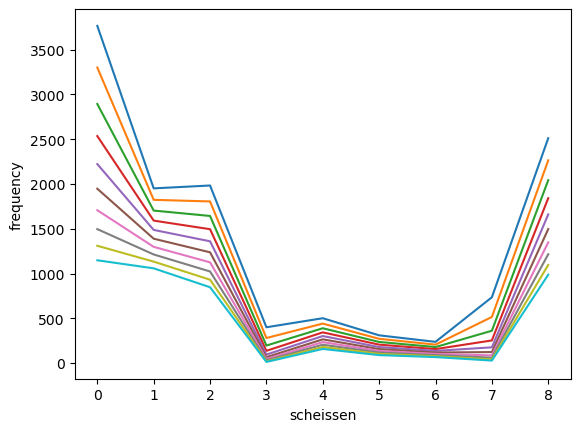

In [11]:

for p in range(20):
    for i in range(len(mt.str)):
        mt.map[i] = int(mt.map[i]*(1-full_dict[mt.str[i]][1]))

    if p%2:
        pp.plot(np.array(mt.map))
pp.ylabel('frequency')
pp.xlabel(mt.str)

3

Text(0, 0.5, 'frequency')

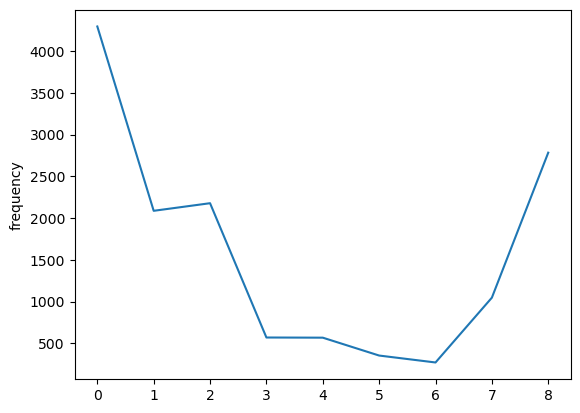

In [13]:
# PLOT FREQUENCY MAP FOR WORD
arr = np.array([4295, 2088, 2179, 571, 569, 355, 272, 1048, 2784])

pp.plot(range(len(arr)), arr)
pp.ylabel('frequency')